In [1]:
from torch import empty
import math
from FC_module import LossMSE, ReLU, Tanh, FCC, Sequential

In [2]:
train_size = 1000
test_size = 200
valid_size = 100
train_input = empty(train_size, 2).uniform_(0,1)
train_target = train_input.add(-0.5).pow(2).sum(1).sub(1 / (7)).multiply(-1).sign().add(1).div(2)

valid_input = empty(valid_size, 2).uniform_(0,1)
valid_target = valid_input.add(-0.5).pow(2).sum(1).sub(1 / (7)).multiply(-1).sign().add(1).div(2)

test_input = empty(test_size, 2).uniform_(0,1)
test_target = test_input.add(-0.5).pow(2).sum(1).sub(1 / (7)).multiply(-1).sign().add(1).div(2)

[Go to Benchamrking](#Benchmarking) with Pytorch

### These two are just for a quick check I know they are terrible :D

In [4]:
def stupid_test_function(a,b):
    if a == 0 or b == 0:
        return 0
    else:
        return 1

In [5]:
def stupid_acc_func(pred,true):
    pred = pred.item() > 0.5
    return (pred == true.item())
    

In [6]:
import torch
import matplotlib.pyplot as plt

In [7]:
def modelTrainer(train_input,train_target,test_input,test_target,test_size):
    seq = Sequential(["FCC","ReLU","FCC"],[[2,8],[], [8,1]],"MSE")
    loss_track = []
    for epoch in range(1000):
        minibatch = 200
        for i in range(0, train_input.size(0), minibatch):
            out,loss = seq.train(train_input.narrow(0, i, minibatch), train_target.narrow(0, i, minibatch).unsqueeze(1))
        if epoch %200 == 0:
            print("Loss:", loss.item())
        loss_track.append(loss)
    plt.figure()
    plt.plot(loss_track)
    print("---------------------------------")
    acc = 0
    count = 0
    for i in range(test_size):
        truth = test_target[i].unsqueeze(0).unsqueeze(1)
        inp = test_input[i,:].unsqueeze(0)
        out = seq.eval(inp)
        #print(out)
        if stupid_acc_func(out,truth):
            acc = acc + 1
    return seq, acc /test_size

Loss: 0.25247490406036377
Loss: 0.24041599035263062
Loss: 0.24037887156009674
Loss: 0.240285262465477
Loss: 0.23664751648902893
---------------------------------
Loss: 0.40321967005729675
Loss: 0.21896715462207794
Loss: 0.19468078017234802
Loss: 0.17013458907604218
Loss: 0.15747956931591034
---------------------------------
Loss: 0.2837408185005188
Loss: 0.22503308951854706
Loss: 0.208968847990036
Loss: 0.18254539370536804
Loss: 0.14254847168922424
---------------------------------
Loss: 0.2584986388683319
Loss: 0.22998082637786865
Loss: 0.20840272307395935
Loss: 0.18134267628192902
Loss: 0.16314689815044403
---------------------------------
Loss: 0.2780054211616516
Loss: 0.24045653641223907
Loss: 0.2404528260231018
Loss: 0.2404477298259735
Loss: 0.24044452607631683
---------------------------------
Loss: 0.4418448507785797
Loss: 0.2168365716934204
Loss: 0.19813014566898346
Loss: 0.17553947865962982
Loss: 0.14146970212459564
---------------------------------
Loss: 0.2796787619590759
Lo

0.935

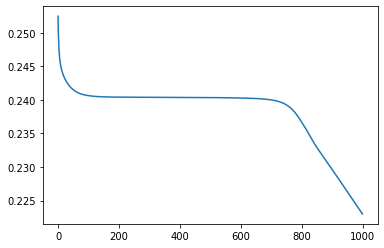

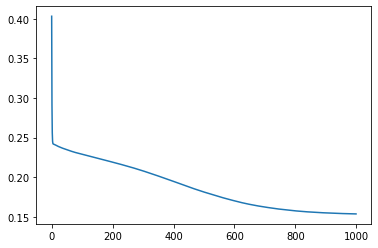

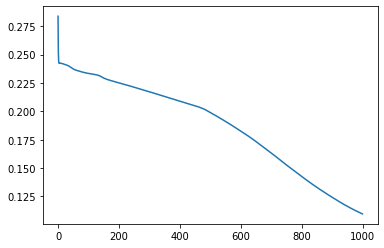

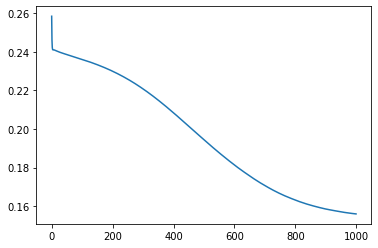

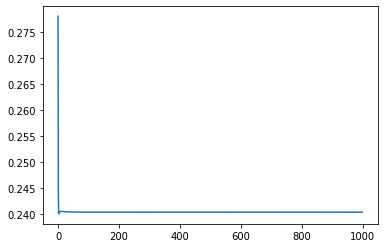

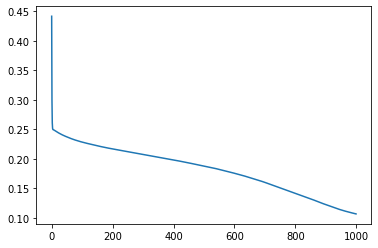

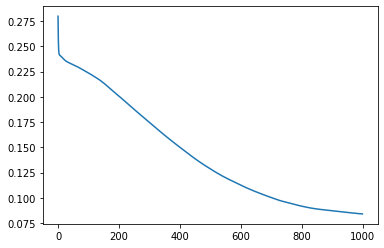

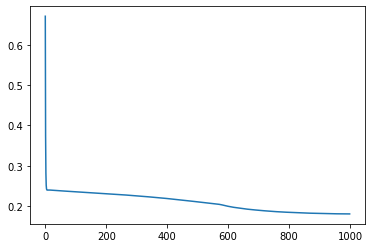

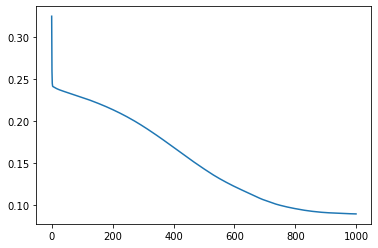

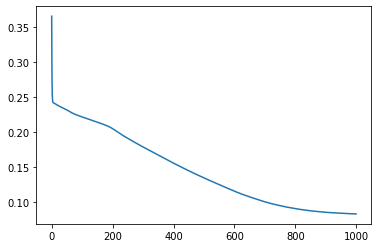

In [8]:
train_size = 1000
test_size = 200
valid_size = 100
train_input = empty(train_size, 2).uniform_(0,1)
train_target = train_input.add(-0.5).pow(2).sum(1).sub(1 / (7)).multiply(-1).sign().add(1).div(2)

valid_input = empty(valid_size, 2).uniform_(0,1)
valid_target = valid_input.add(-0.5).pow(2).sum(1).sub(1 / (7)).multiply(-1).sign().add(1).div(2)

test_input = empty(test_size, 2).uniform_(0,1)
test_target = test_input.add(-0.5).pow(2).sum(1).sub(1 / (7)).multiply(-1).sign().add(1).div(2)



models = []
best_acc = 0
curr_acc = 0
best_idx = -1
for idx in range(10):    
    model,curr_acc = modelTrainer(train_input,train_target,valid_input,valid_target,valid_size) 
    models.append(model)
    if (curr_acc > best_acc):
        best_acc = curr_acc
        best_idx = idx

acc = 0
count = 0
for i in range(test_size):
    truth = test_target[i].unsqueeze(0).unsqueeze(1)
    inp = test_input[i,:].unsqueeze(0)
    out = models[best_idx].eval(inp)
    #print(out)
    if stupid_acc_func(out,truth):
        acc = acc + 1
acc /test_size

In [9]:
best_idx

6

In [10]:
test_target

tensor([0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
        1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 0.])

In [11]:
builder = NN_builder()
test = empty(1000,2).random_(0,2)
for i in range(1000):
    truth = empty(1,1).fill_(stupid_test_function(test[i,0],test[i,1]))
    inp = test[i,:].unsqueeze(0)
    out = builder.model_train(inp,truth)
    
test2 = empty(100,2).random_(0,2)
acc = 0
count = 0
for i in range(100):
    truth = empty(1,1).fill_(stupid_test_function(test2[i,0],test2[i,1]))
    inp = test2[i,:].unsqueeze(0)
    out = builder.model_eval(inp)
    #print(out)
    if out.item() > 0.5:
        count = count + 1
    if stupid_acc_func(out,truth):
        acc = acc + 1
acc /100

0.73

### Benchmarking

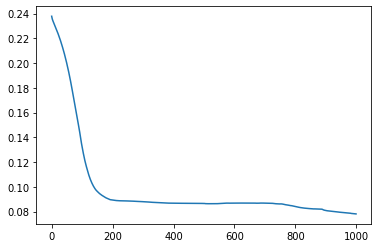

In [12]:
from torch import optim, Tensor, nn
from torch import Tensor
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.set_grad_enabled(True)

def create_model():
    return nn.Sequential(
        nn.Linear(2, 8),
        nn.ReLU(),
        nn.Linear(8, 1),
#         nn.ReLU(),
    )

def train_model(model, train_input, train_target):
    loss_track = []
    loss_func = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr = 0.1)
    mini_batch = 200
    # Iterate through epochs
    for i in range(1000):
        #Iterate t hrough mini batches
        for b in range(0, train_input.size(0), mini_batch):
            # Forward pass selecting the corresponding minibacth
            output = model(train_input.narrow(0, b, mini_batch))
            # Calculate loss
            loss = loss_func(output.squeeze(), train_target.narrow(0, b, mini_batch))
#             print("Loss:", loss.item())
            # Reset zero grad
            model.zero_grad()
            # Backward pass
            loss.backward()
            #Update step
            optimizer.step()
        loss_track.append(loss)
    plt.plot(loss_track)
    
def compute_nb_errors(model, data_input, data_target):
        output = model(data_input)
        comp = output.argmax(dim = 1) != data_target.argmax(dim = 1)
        nb_errors = torch.where(comp)[0].size()[0]
        error_rate = nb_errors/data_input.size(0)
        print(f'There were a total of {nb_errors} errors, or {error_rate} of the testing set.')
        
        
model = create_model()
train_model(model, train_input, train_target)
# compute_nb_errors(model, test_input, test_target)